- Name: Deep Salunkhe
- Roll No.:21102A0014
- [SEM-7 ML Lab8 Github Link](https://github.com/deepsalunkhee/Learn-and-Practice/tree/master/SEM-7/ML/Lab8)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [71]:
# Load the dataset (replace 'data.csv' with your actual file path)
df = pd.read_csv('/content/Mall_Customers.csv')

# Inspect the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
# Select the relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [73]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [74]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels back to the original dataframe
df['Cluster'] = dbscan_labels


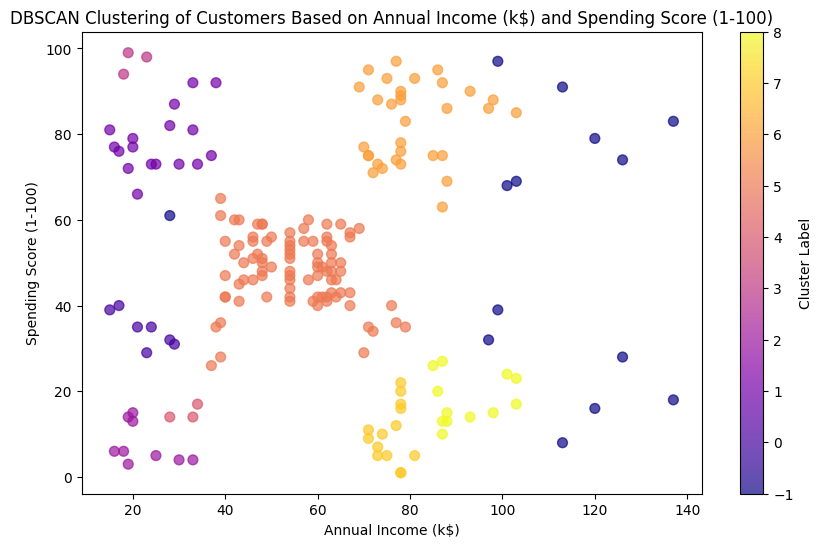

In [75]:
# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title('DBSCAN Clustering of Customers Based on Annual Income (k$) and Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.show()


In [76]:
# Count the number of clusters (excluding noise)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Count the number of noise points
num_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise}")


Number of clusters: 9
Number of noise points: 14


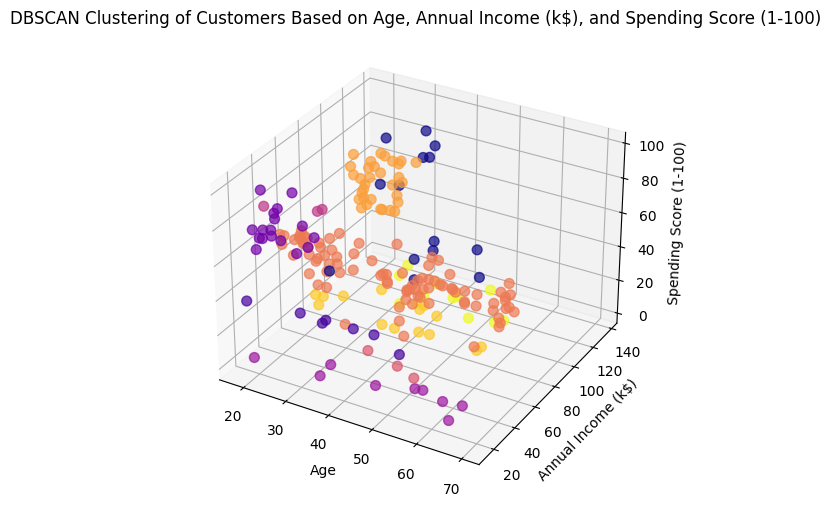

In [77]:
# 3D plot if you have more features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
ax.set_title('DBSCAN Clustering of Customers Based on Age, Annual Income (k$), and Spending Score (1-100)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


In [78]:
# Count the number of clusters (excluding noise)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Count the number of noise points
num_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise}")


Number of clusters: 9
Number of noise points: 14
